In [ ]:
import cv2
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
from skimage.transform import PiecewiseAffineTransform, PolynomialTransform, AffineTransform, EuclideanTransform,warp, SimilarityTransform

from skimage.feature import (corner_harris, corner_subpix, corner_peaks,
                             plot_matches)
from skimage.transform import warp, AffineTransform
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray
from skimage.measure import ransac
from skimage.metrics import mean_squared_error

import random 
f = open("stim_presentation.txt", "r")
i = 0
header = []
trials = []
for trial in f:
    if (i == 0):
        header = trial.split()
    else:
        trials.append(trial.split())
    i = i + 1

tu = [] #texture uniform
tr = [] #texture rule
su = [] #symbolic uniform
sr = [] #symbolic rule

for t in trials:
    condition = t[2]
    if (condition == '1'):
        tu.append(t)
    elif (condition == '2'):
        tr.append(t)
    elif (condition == '3'):
        su.append(t)
    else:
        sr.append(t)
def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )      
class ShapeDetector:
	def __init__(self):
		pass
	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)
		# if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"
		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4 and cv2.isContourConvex(approx):
			approx = approx.reshape(-1, 2)
			max_cos = np.max([angle_cos( approx[i], approx[(i+1) % 4], approx[(i+2) % 4] ) for i in range(4)])
			if max_cos < 0.1:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			#(x, y, w, h) = cv2.boundingRect(approx)
			#ar = w / float(h)
			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			#shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
				shape = "rectangle"
		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"
		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"
		# return the name of the shape
		return shape

def returnNewTransform1(src,dst):
    #try:
    tform, inliers = ransac((src, dst), SimilarityTransform, min_samples=3,
                                               residual_threshold=2, max_trials=5000)
    outliers = (inliers == False)
    return (tform,outliers,"aff")
def returnNewTransform2(src,dst,sample_size):
    #try:
    tform, inliers = ransac((src, dst), AffineTransform, min_samples=sample_size,
                                               residual_threshold=2, max_trials=8000)
    outliers = (inliers == False)
    return (tform,outliers,"aff")
    
    
MIN_MATCH_COUNT = 10

FLANN_INDEX_KDTREE = 1

Accuracy = 0
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import structural_similarity as ssim
import random

##use 50 for demo

trial_num=5  
    ##use 50 for demo
    #6 is for substraction
        #trial_num= 3
        #24 for addition rule
        #16 For SuBSTRACTION RULE
        #5 for Rotation Rule
        #12 again
cue_image = sr[trial_num][1]
choice_l_image = sr[trial_num][4]
choice_r_image = sr[trial_num][5]
correct = sr[trial_num][6]
img_dir = 'images/'

choice1 = choice_l_image
choice2 = choice_r_image
        # Read the main image
img_rgb = cv2.imread(img_dir+cue_image)
        # Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        # Read the template
template1 = cv2.imread(img_dir + choice1,0)
template2 = cv2.imread(img_dir + choice2,0)
choice1 = choice_l_image
choice2 = choice_r_image
        # Read the main image
img_rgb = cv2.imread(img_dir+cue_image)
        # Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        # Read the template
template1 = cv2.imread(img_dir + choice1,0)
template2 = cv2.imread(img_dir + choice2,0)
contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
sd = ShapeDetector()
tW, tH = template1.shape[::-1]
tW2, tH2 = template2.shape[::-1]
ratio = 1
# loop over the contours
bb = []
for c in contours:
                        # compute the center of the contour, then detect the name of the
                        # shape using only the contour
    M = cv2.moments(c)
    shape = sd.detect(c)
    if (shape != "rectangle"):
        pass
    else:
                        # multiply the contour (x, y)-coordinates by the resize ratio,
                        # then draw the contours and the name of the shape on the image
        rect = cv2.boundingRect(c)
                            #if ((rect[2] - tW) > -10) or ((rect[3] - tH) > -10): continue
                            #print (cv2.contourArea(c))
                            # show the output image
        x,y,w,h = cv2.boundingRect(c)

        if ((tW*tH)/(w*h) < 1.5):
            bb.append(rect)
        else:
            pass

BoxList = []
for box in bb:
    x,y,w,h = box
    t1 = img_gray.copy()
                    #print(x)
    src = (y+tH/2)
    dst = img_gray.shape[0]/2
    if(abs(src/dst - 1) < 0.005):
                        #print(img_gray.shape[0]/2)
        t1 = t1[y:y+tH,x:x+tW]
        rect = cv2.rectangle(t1, (0,0), (tH,tW),(255,255,255), 20)
        BoxList.append(rect)


box1= BoxList[3]
box2 = BoxList[2]
box3 = BoxList[1]

BoxList = []
BoxList.append(box1)
BoxList.append(box2)
BoxList.append(box3)

def checkSimilarityScore(TFORM,Filter,ROUTE,BoxList):
            #top_3_idx = np.argsort(WEIGHT)
            #top_3_values = [TFORM[i] for i in top_3_idx]
            #top_3_w = [WEIGHT[i] for i in top_3_idx]
            #top_3_values = top_3_values[::-1]
            #top_3_w = top_3_w[::-1]
    out = 0
    for i in range(len(TFORM)):
        step = warp(BoxList[1], TFORM[i],cval=1, mode ='constant')
        out = out + step
        if ROUTE == 1:
            if Filter[i] == 1:
                blur = cv2.GaussianBlur(out,(3,3),1)
                _,out = cv2.threshold(out,out.max()/3,out.max(),cv2.THRESH_BINARY)
            elif Filter[i] == 2:
                blur = cv2.GaussianBlur(out,(3,3),1)
                _,out = cv2.threshold(out,2*out.max()/3,out.max(),cv2.THRESH_BINARY)
            else:
                pass
        else:
            if Filter[i] == 1:
                blur = cv2.GaussianBlur(out,(3,3),1)
                _,out = cv2.threshold(out,out.max()/2,out.max(),cv2.THRESH_BINARY)
            elif Filter[i] == 2:
                blur = cv2.GaussianBlur(out,(3,3),1)
                _,out = cv2.threshold(out,2*out.max()/3,out.max(),cv2.THRESH_BINARY)
            else:
                pass


    out = np.array(out, dtype = np.float64)
    out *= (255.0/out.max())
    out = np.array(out, dtype = np.uint8)
            #ssim_const = ssim(BoxList[2], out,
            #                  data_range=out.max() - out.min())
    ssim_const = mse(BoxList[2], out)
    return ssim_const

def applyRule(TFORM,Filter,ROUTE,image):

    out = 0
    for i in range(len(TFORM)):
        step = warp(image, TFORM[i],cval=1, mode ='constant')
        out = out + step
        if ROUTE == 1:
            if Filter[i] == 1:
                out = cv2.GaussianBlur(out,(3,3),1)
                _,out = cv2.threshold(out,out.max()/3,out.max(),cv2.THRESH_BINARY)
            elif Filter[i] == 2: #THIS IS FOR SUBSTRACTION
                blur = cv2.GaussianBlur(out,(3,3),1)
                _,out = cv2.threshold(out,2*out.max()/3,out.max(),cv2.THRESH_BINARY)
            else:
                pass
        else: ##GOOD FOR ADDITION
            if Filter[i] == 1:
                blur = cv2.GaussianBlur(out,(3,3),1)
                _,out = cv2.threshold(out,out.max()/2,out.max(),cv2.THRESH_BINARY)
            elif Filter[i] == 2:
                blur = cv2.GaussianBlur(out,(3,3),1)
                _,out = cv2.threshold(out,2*out.max()/3,out.max(),cv2.THRESH_BINARY)
            else:
                pass

                    #out = np.array(255*out, dtype = np.uint8)
                    #blur = cv2.GaussianBlur(out,(3,3),1)
                    #_,out = cv2.threshold(blur,255,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    out = np.array(out, dtype = np.float64)

    out *= (255.0/out.max())
    out = np.array(out, dtype = np.uint8)
    return out
        ##STRATEGY 2
good1 = []
orb = cv2.ORB_create()
        ##########TRY TO get your own FEATURES INSTEAD!!!!!!!!!
sift = cv2.xfeatures2d.SIFT_create()
        # Find keypoints and descriptors directly

try:
    kp1, des1 = orb.detectAndCompute(box1,None) 
    kp2, des2 = orb.detectAndCompute(box2,None) 

    matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE_HAMMING)
    nn_matches = matcher.knnMatch(des1, des2, 2)
    matched1 = []
    matched2 = []
    nn_match_ratio = 0.8 # Nearest neighbor matching ratio
    for m, n in nn_matches:
        if m.distance < nn_match_ratio * n.distance:
            good1.append(m)
except:
    kp1, des1 = sift.detectAndCompute(box1,None) 
    kp2, des2 = sift.detectAndCompute(box2,None) 
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
        # Apply ratio test
            #good1 = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good1.append(m)
src = np.float32([ kp1[m.queryIdx].pt for m in good1 ]).reshape(-1,2)
dst = np.float32([ kp2[m.trainIdx].pt for m in good1 ]).reshape(-1,2)


tform1,FIRSToutliers,typ = returnNewTransform1(dst,src)
            #inlier_idxs = np.asarray(outliers[outliers == 0])
outlier_idxs = np.nonzero(FIRSToutliers == 1)[0]
inlier_idxs = np.nonzero(FIRSToutliers == 0)[0]

num_inliers = len(inlier_idxs)
new_outlier_length = len(outlier_idxs)

old_outlier_length = 0
globalSimilarity = float('inf')
old_local_sim = float('inf')
        #TFORM.append(tform1)
        #Filter.append(0)
if (len(outlier_idxs) > 2):
    GS = []
    GT = []
    GF = []
    GR = []
    for r in range(2):
        outlier_idxs = np.nonzero(FIRSToutliers == 1)[0]

        TFORM = []
        Filter = []
        sn = 2 #int(len(inlier_idxs)/3)
        j = 0
        route = r+1
                #print(route)
        while (len(outlier_idxs) > 2): #if the actual list of outliers being updated reached below 2 stop, else
            j = j +1
            if j > 7:
                break
                        ##RANDOMLY SAMPLE INLIERs
            SIM_LIST = []
            LOCAL_SIM_LIST = []
            TFORM_RANDOM_RECORD = []
            Filter_RANDOM_RECORD = []
            O_list = []
            THRES_LIST = []
            if (j == 1):
                start = 10
            else:
                start = 1
            for k in range(start):
                random.seed()
                if (random.randint(1,2) == 1):
                    arr2 = np.array(random.sample(list(inlier_idxs), sn))
                            ##Concatenate the inlier and outlier
                    arr = np.concatenate((outlier_idxs, arr2))
                        #print(arr)
                else:
                    arr = outlier_idxs
                a = src[arr]
                b = dst[arr]
                try:
                    tform2,newoutliers,typ2 = returnNewTransform2(b,a,3)
                except:
                    tform2 = None

                new_outlier_idxs = np.nonzero(newoutliers)[0]
                if tform2 != None:
                               # if (new_outlier_length != old_outlier_length):
                                    #lets try this new transform
                    TFORM.append(tform2)
                    m = random.randint(1,2)
                    Filter.append(m)
                            #similarity = checkSimilarityScore(TFORM,Filter,route,BoxList) #this only pick 3 transform for now
                    LocalSimilarity = checkSimilarityScore([tform2],[m],route,BoxList) #this only pick 3 transform for now

                    TFORM.pop()
                    Filter.pop()
                    TFORM_RANDOM_RECORD.append(tform2)
                    Filter_RANDOM_RECORD.append(m)
                            #SIM_LIST.append(similarity)
                    LOCAL_SIM_LIST.append(LocalSimilarity)

                    O_list.append(new_outlier_idxs)
                else:
                    TFORM_RANDOM_RECORD.append(0)
                    Filter_RANDOM_RECORD.append(0)
                            #SIM_LIST.append(similarity)
                    LOCAL_SIM_LIST.append(float("inf"))

                    O_list.append(0)
                                    #does it increase similarity?
            if (min(LOCAL_SIM_LIST) < old_local_sim):
                        #THINK about LOCAL vs GLOBAL
                    #globalSimilarity = max(SIM_LIST)
                bestLoc = (LOCAL_SIM_LIST.index(min(LOCAL_SIM_LIST)))
                outlier_idxs = O_list[bestLoc]
                TFORM.append(TFORM_RANDOM_RECORD[bestLoc])
                Filter.append(Filter_RANDOM_RECORD[bestLoc])
                old_local_sim = min(LOCAL_SIM_LIST)
        globalSimilarity = checkSimilarityScore(TFORM,Filter,route,BoxList) #this only pick 3 transform for now
        GS.append(globalSimilarity)
        GT.append(TFORM)
        GF.append(Filter)
        GR.append(route)
        SIM_LIST = []
        LOCAL_SIM_LIST = []
        TFORM_RANDOM_RECORD = []
        Filter_RANDOM_RECORD = []
        O_list = []
        THRES_LIST = []
                #globalSimilarity = float('inf')
        old_local_sim = float('inf')

    bestGlobalLoc = (GS.index(min(GS)))
    TFORM =  GT[bestGlobalLoc]
    Filter = GF[bestGlobalLoc]
    Route = GR[bestGlobalLoc] 
    out = applyRule(TFORM,Filter,Route,BoxList[0])    
    out1 = applyRule(TFORM,Filter,Route,BoxList[2])    
    out2 = applyRule(TFORM,Filter,Route,out1) 
    out3 = applyRule(TFORM,Filter,Route,out2)           
    fig, ax = plt.subplots(1,6,figsize=(20, 20))
    plt.tight_layout()
    ax[0].axis('off');
    ax[0].set_title("input1")
    ax[0].imshow(BoxList[0],cmap="gray")
    ax[1].axis('off');
    ax[1].set_title("prediction1")
    ax[1].imshow(out,cmap="gray")
    ax[2].axis('off');
    ax[2].set_title("input2")
    ax[2].imshow(BoxList[2],cmap="gray")
    ax[3].axis('off');
    ax[3].set_title("prediction2")
    ax[3].imshow(out1,cmap="gray")
    ax[4].axis('off');
    ax[4].set_title("prediction3")
    ax[4].imshow(out2,cmap="gray")
    ax[5].axis('off');
    ax[5].set_title("prediction4")
    ax[5].imshow(out3,cmap="gray")
    plt.show()
else:
            #instead of warping input1...
    out = (warp(BoxList[0], tform1,cval=1, mode ='constant'))
            #instead of warping input1...
    out1 = warp(BoxList[2], tform1,cval=1, mode ='constant')
            #instead of warping input1...
    out2 = warp(out1, tform1,cval=1, mode ='constant')
            #instead of warping input1...
    out3 = warp(out2, tform1,cval=2, mode ='constant')

    fig, ax = plt.subplots(1,6,figsize=(20, 20))
    plt.tight_layout()
    ax[0].axis('off');
    ax[0].set_title("input1")
    ax[0].imshow(BoxList[0],cmap="gray")
    ax[1].axis('off');
    ax[1].set_title("prediction1")
    ax[1].imshow(out,cmap="gray")
    ax[2].axis('off');
    ax[2].set_title("input2")
    ax[2].imshow(BoxList[2],cmap="gray")
    ax[3].axis('off');
    ax[3].set_title("prediction2")
    ax[3].imshow(out1,cmap="gray")
    ax[4].axis('off');
    ax[4].set_title("prediction3")
    ax[4].imshow(out2,cmap="gray")
    ax[5].axis('off');
    ax[5].set_title("prediction4")
    ax[5].imshow(out3,cmap="gray")
    plt.show()
    

        

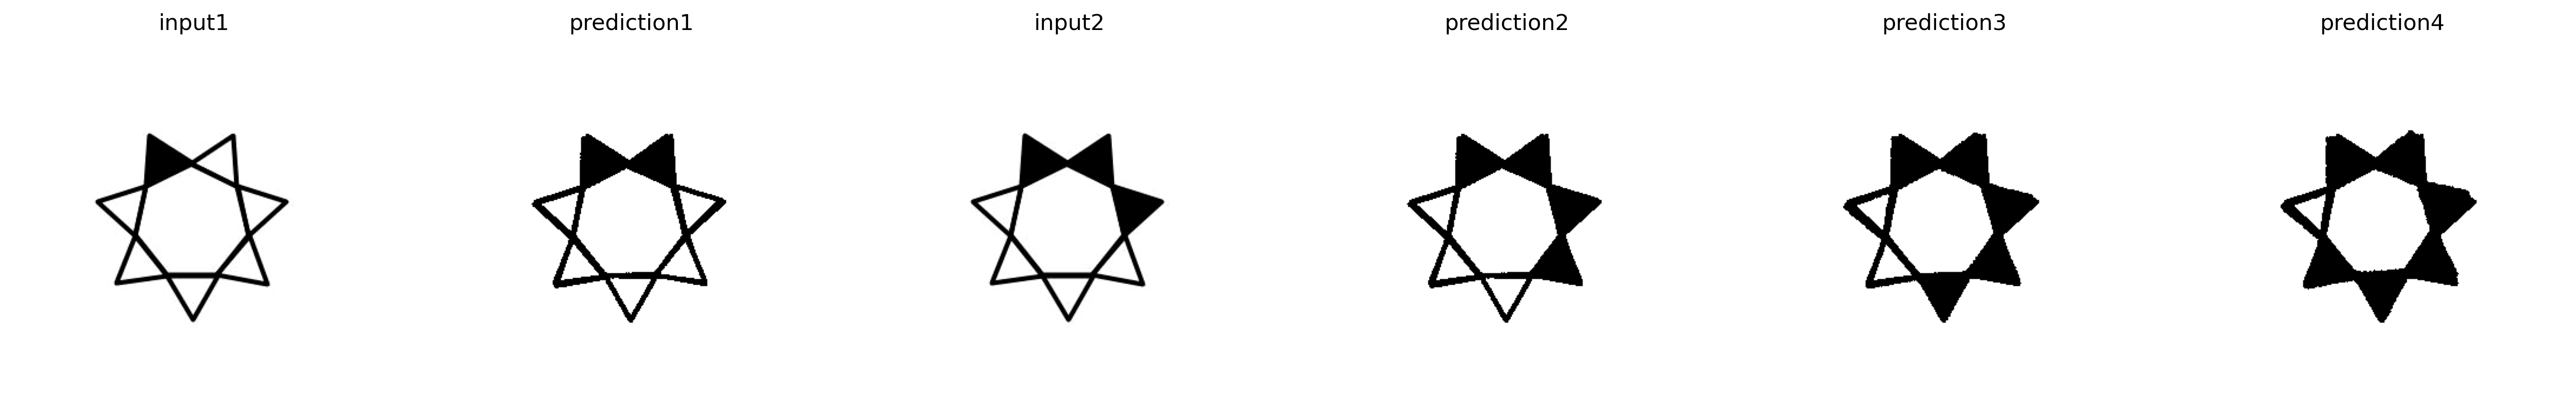

In [38]:
plt.rcParams['figure.dpi'] = 300

out = applyRule(TFORM,Filter,1,BoxList[0])    
out1 = applyRule(TFORM,Filter,1,BoxList[2])    
out2 = applyRule(TFORM,Filter,1,out1) 
out3 = applyRule(TFORM,Filter,1,out2)   

fig, ax = plt.subplots(1,6,figsize=(20, 20))
plt.tight_layout()
ax[0].axis('off');
ax[0].set_title("input1")
ax[0].imshow(BoxList[0],cmap="gray")
ax[1].axis('off');
ax[1].set_title("prediction1")
ax[1].imshow(out,cmap="gray")
ax[2].axis('off');
ax[2].set_title("input2")
ax[2].imshow(BoxList[2],cmap="gray")
ax[3].axis('off');
ax[3].set_title("prediction2")
ax[3].imshow(out1,cmap="gray")
ax[4].axis('off');
ax[4].set_title("prediction3")
ax[4].imshow(out2,cmap="gray")
ax[5].axis('off');
ax[5].set_title("prediction4")
ax[5].imshow(out3,cmap="gray")

plt.show()